<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-и-изучите-файл" data-toc-modified-id="Откройте-и-изучите-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте и изучите файл</a></span></li><li><span><a href="#Разбейте-данные-на-выборки" data-toc-modified-id="Разбейте-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбейте данные на выборки</a></span></li><li><span><a href="#Исследуйте-модели" data-toc-modified-id="Исследуйте-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуйте модели</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Проверьте-модель-на-тестовой-выборке" data-toc-modified-id="Проверьте-модель-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверьте модель на тестовой выборке</a></span></li><li><span><a href="#(бонус)-Проверьте-модели-на-адекватность" data-toc-modified-id="(бонус)-Проверьте-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(бонус) Проверьте модели на адекватность</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

Импортируем библиотеки для работы:

In [1]:
!pip install fast_ml

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats as st
import numpy as np
from fast_ml.model_development import train_valid_test_split

In [3]:
data = pd.read_csv('./datasets/users_behavior.csv')

In [4]:
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [5]:
data.dtypes

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

Предобработка выполнена в одном из предыдущих проектов, целевой столбец для классификации `is_ultra`. Признаки - `calls`, `minutes`, `messages`, `mb_used`

По предварительному анализу данных и проверке гипотез были сделаны следующие выводы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- пользователи из Москвы приносят не больше выручки, чем пользователи из других городов

Таким образом, мы заинтересованы в новых "ультра"-клиентах по всей РФ

## Разбейте данные на выборки

По правилу долей 3 к 1 к 1 выделим 20% данных на тестовую выборку и 20% данных на валидационную, для фиксированного результата работы генератора псевдослучайных чисел примем константой `random_state`=555:

In [6]:
data_temp, data_test = train_test_split(data, test_size=0.2, random_state=555)

In [7]:
data_test

,calls,minutes,messages,mb_used,is_ultra
1100,61.0,443.13,45.0,15349.65,0
549,81.0,560.68,21.0,16369.73,0
223,110.0,881.06,72.0,11441.18,0
1122,50.0,345.79,0.0,18908.64,0
992,82.0,569.13,24.0,18749.93,0
...,...,...,...,...,...
2493,67.0,492.40,16.0,22783.19,0
497,36.0,239.79,0.0,14611.03,0
2164,73.0,559.08,31.0,22763.31,0
2134,48.0,289.40,84.0,15696.86,1


In [8]:
data_train, data_valid = train_test_split(
    data_temp, test_size=0.25, random_state=555)

In [9]:
data_valid

,calls,minutes,messages,mb_used,is_ultra
1538,49.0,323.04,0.0,21078.02,0
127,68.0,444.41,35.0,26460.37,1
2300,5.0,40.85,1.0,0.01,0
505,169.0,1111.51,53.0,27728.78,1
413,67.0,424.20,37.0,31466.89,1
...,...,...,...,...,...
1709,41.0,233.75,24.0,15252.74,0
446,93.0,680.59,70.0,16376.46,1
1194,105.0,830.37,21.0,21165.03,1
2061,66.0,478.48,0.0,16962.58,0


In [10]:
data_train

,calls,minutes,messages,mb_used,is_ultra
1318,128.0,846.50,50.0,19450.33,1
1182,61.0,431.24,7.0,8977.45,0
1649,0.0,0.00,211.0,27695.86,1
1037,56.0,357.36,0.0,12965.49,0
2737,30.0,155.05,23.0,21850.31,0
...,...,...,...,...,...
1007,73.0,550.58,25.0,18322.63,0
1977,76.0,500.53,0.0,14620.28,0
930,103.0,730.61,154.0,18565.13,1
1769,50.0,320.63,60.0,19331.57,0


Выделим признаки для каждой из выборок:

In [11]:
# целевой признак is_ultra
target_train = data_train['is_ultra']
target_valid = data_valid['is_ultra']
target_test = data_test['is_ultra']
# остальные признаки для классификации
features_train = data_train.drop('is_ultra', axis=1)
features_valid = data_valid.drop('is_ultra', axis=1)
features_test = data_test.drop('is_ultra', axis=1)

In [12]:
train_, valid_, test_ = np.split(data.sample(frac=1, random_state=821), [
                                 int(.6*len(data)), int(.8*len(data))])
train_.shape

(1928, 5)

In [13]:
valid_.shape

(643, 5)

In [14]:
test_.shape

(643, 5)

In [15]:
data.sample(frac=1, random_state=555)

,calls,minutes,messages,mb_used,is_ultra
1100,61.0,443.13,45.0,15349.65,0
549,81.0,560.68,21.0,16369.73,0
223,110.0,881.06,72.0,11441.18,0
1122,50.0,345.79,0.0,18908.64,0
992,82.0,569.13,24.0,18749.93,0
...,...,...,...,...,...
2628,89.0,635.86,0.0,8417.03,1
1057,81.0,516.56,2.0,19457.42,1
3049,58.0,402.10,0.0,22313.53,0
686,79.0,562.99,19.0,25508.19,1


In [16]:
features_train, target_train, features_valid, target_valid, features_test, target_test =\
    train_valid_test_split(data, target='is_ultra',
                           train_size=0.6, valid_size=0.2, test_size=0.2)

In [17]:
features_train.shape

(1928, 4)

## Исследуйте модели

Для задачи классификации в текущем спринте применялись три алгоритма с различными гиперпараметрами:
- Дерево решений (DecisionTreeClassifier)
- Случайный лес (RandomForestClassifier)
- Логистическая регрессия (LogisticRegression)


### DecisionTreeClassifier

Нужно перебрать в алгоритме обучения разные варианты глубины дерева, ограничимся максимальным значением `total_models` = 40:

In [18]:
total_models = 40
accuracy_list = []
depth_list = [i for i in range(1, total_models+1)]
threshold_list = [0.75 for i in range(1, total_models+1)]
best_result = 0
for depth in range(1, total_models+1):
    model = DecisionTreeClassifier(random_state=555, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    accuracy_list.append(accuracy)
    if accuracy > best_result:
        best_model_tree = model
        best_result = accuracy
print(f'Модель с наивысшей точностью: {best_model_tree}')
print(f'Точность модели {best_result}')

Модель с наивысшей точностью: DecisionTreeClassifier(max_depth=10, random_state=555)
Точность модели 0.7807153965785381


Для наглядности отобразим в виде графика:

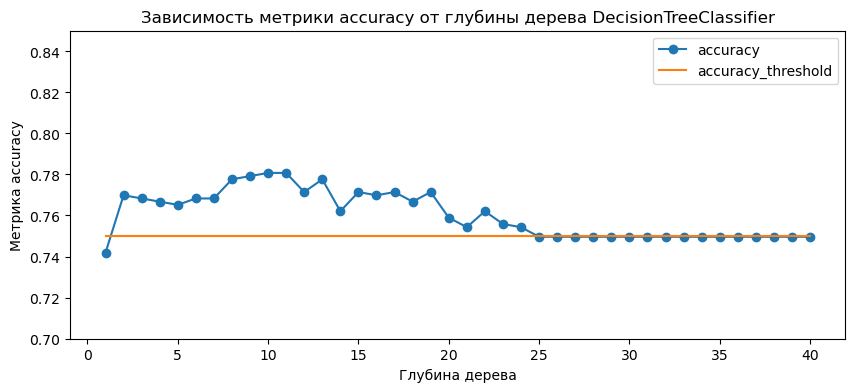

In [19]:
acc_depth = pd.DataFrame(
    {'depth': depth_list, 'accuracy': accuracy_list, 'accuracy_threshold': threshold_list})
ax = acc_depth.plot(x="depth", y="accuracy",
                    marker="o",
                    figsize=(10, 4),
                    ylim=(0.7, 0.85))
acc_depth.plot(x="depth", y="accuracy_threshold",
               title='Зависимость метрики accuracy от глубины дерева DecisionTreeClassifier',
               xlabel='Глубина дерева',
               ylabel='Метрика accuracy',
               ax=ax)
plt.show()

**Вывод**

Самая высокая метрика `accuracy` = 0.7978227060653188 для глубины дерева `max_depth` = 6.

По условиям задачи необходимо получить `accuracy` хотя бы 0.75: при глубине дерева больше 15 видим выход за допустимую погрешность. А начиная с глубины дерева 26 `accuracy` ложится на асимптоту.

График выглядит логично, так как у нас всего 4 признака, по которым строится дерево, а решения по классификации бинарные. С некоторого момента просто отпадает смысл ветвиться дальше.



### RandomForestClassifier

Нужно перебрать в алгоритме обучения разные значения `n_estimators`, ограничимся максимальным значением `total_models` = 40:

In [20]:
total_models = 40
accuracy_list = []
estim_list = [i for i in range(1, total_models+1)]
threshold_list = [0.75 for i in range(1, total_models+1)]
best_result = 0
for est in range(1, total_models+1):
    model = RandomForestClassifier(random_state=555, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    accuracy_list.append(accuracy)
    if accuracy > best_result:
        best_model_forest = model
        best_result = accuracy
print(f'Модель с наивысшей точностью: {best_model_forest}')
print(f'Точность модели {best_result}')

Модель с наивысшей точностью: RandomForestClassifier(n_estimators=26, random_state=555)
Точность модели 0.7962674961119751


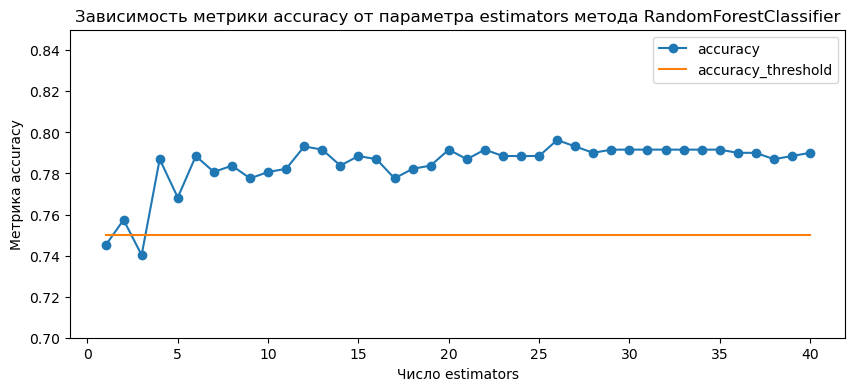

In [21]:
acc_estim = pd.DataFrame({'estimators_number': estim_list,
                         'accuracy': accuracy_list, 'accuracy_threshold': threshold_list})
ax = acc_estim.plot(x="estimators_number", y="accuracy",
                    marker="o",
                    figsize=(10, 4),
                    ylim=(0.7, 0.85))
acc_estim.plot(x="estimators_number", y="accuracy_threshold",
               title='Зависимость метрики accuracy от параметра estimators метода RandomForestClassifier',
               xlabel='Число estimators',
               ylabel='Метрика accuracy',
               ax=ax)
plt.show()

**Вывод**

Фактически самая высокая метрика `accuracy` = 0.8040435458786936 для параметра `n_estimators` = 34.

По условиям задачи необходимо получить `accuracy` хотя бы 0.75: начиная с количества "деревьев" от 2 уже получаем достаточную точность, а с отметки 15 график выходит на асимптоту, что в условиях слабого железа/необходимости сэкономить время, может позволить ускорить расчеты и получить достаточную точность

### LogisticRegression

Для логистической регрессии основным изменяемым гиперпараметром является число итераций `iter`. Проведем анализ по аналогии с пунктами 3.1 и 3.2. Число итераций будем брать кратным 50.

In [22]:
total_models = 20
accuracy_list = []
iter_list = [i*50 for i in range(1, total_models+1)]
threshold_list = [0.75 for i in range(1, total_models+1)]
best_result = 0
for iter_ in range(1, total_models+1):
    iter = iter_*50
    model = LogisticRegression(random_state=555, solver='lbfgs', max_iter=iter)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions_valid)
    accuracy_list.append(accuracy)
    if accuracy > best_result:
        best_model_logistic = model
        best_result = accuracy
print(f'Модель с наивысшей точностью: {best_model_logistic}')
print(f'Точность модели {best_result}')

Модель с наивысшей точностью: LogisticRegression(max_iter=50, random_state=555)
Точность модели 0.7091757387247278


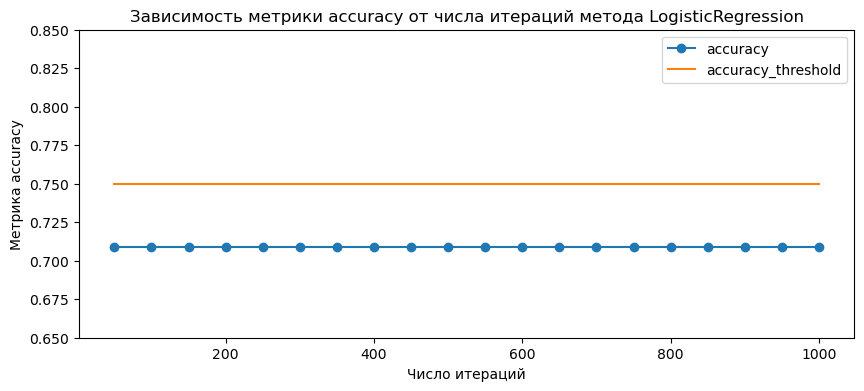

In [23]:
acc_iter = pd.DataFrame({'iterations_number': iter_list,
                        'accuracy': accuracy_list, 'accuracy_threshold': threshold_list})
ax = acc_iter.plot(x="iterations_number", y="accuracy",
                   marker="o",
                   figsize=(10, 4),
                   ylim=(0.65, 0.85))
acc_iter.plot(x="iterations_number", y="accuracy_threshold",
              title='Зависимость метрики accuracy от числа итераций метода LogisticRegression',
              xlabel='Число итераций',
              ylabel='Метрика accuracy',
              ax=ax)
plt.show()

**Вывод**

- В настоящей задаче кластеризации клиентов по тарифам обучение методом логистической регрессии не дает достаточно точного результата
- Максимальная точность достигается на малом количестве итераций и является константной. Метрика `accuracy` = 0.713841368584759
- Возможно стоило бы попробовать другие `solver`, например более простой спуск по градиенту - но квази-ньютоновский алгоритм lbfgs (Broyden–Fletcher–Goldfarb–Shanno в условиях ограниченной памяти) считается наиболее универсальным для большинства выборок. И если он не дал достаточного решения, то не даст и упрощение

## Проверьте модель на тестовой выборке

Проверим лучшие модели из категорий RandomForestClassifier и DecisionTreeClassifier

In [24]:
best_model_tree

DecisionTreeClassifier(max_depth=10, random_state=555)

In [25]:
predictions_test_tree = best_model_tree.predict(features_test)

In [26]:
accuracy_test_tree = accuracy_score(target_test, predictions_test_tree)
accuracy_test_tree

0.8009331259720062

In [27]:
best_model_forest

RandomForestClassifier(n_estimators=26, random_state=555)

In [28]:
predictions_test_forest = best_model_forest.predict(features_test)

In [29]:
accuracy_test_forest = accuracy_score(target_test, predictions_test_forest)
accuracy_test_forest

0.8009331259720062

**Вывод**
- Обе модели проходят отсечку 0.75 по метрике `accuracy` и для тестовой выборки данных
- Лучшей из всех является модель классификатора DecisionTreeClassifier с `accuracy` = 0.7822706065318819

## (бонус) Проверьте модели на адекватность

Из Википедии:

Адекватность модели — совпадение свойств (функций/параметров/характеристик и т. п.) модели и соответствующих свойств моделируемого объекта. Адекватностью называется совпадение модели моделируемой системы в отношении цели моделирования.

Оценка адекватности модели — проверка соответствия модели реальной системе. Оценка адекватности модели реальному объекту оценивается по близости результатов расчетов экспериментальным данным.

Два основных подхода к оценке адекватности:

1) по средним значениям откликов модели и системы

Проверяется гипотеза о близости средних значений каждой n-й компоненты откликов модели Yn известным средним значениям n-й компоненты откликов реальной систем.

2) по дисперсиям отклонений откликов модели от среднего значения откликов систем

Сравнение дисперсии проводят с помощью критерия F (проверяют гипотезы о согласованности), с помощью критерия согласия χ 2 \chi ^{2} (при больших выборках, n>100), критерия Колмогорова-Смирнова (при малых выборках, известны средняя и дисперсия совокупности), Кохрена и др. 

*Если верно понял данный текст, то можно попробовать проверить проверить гипотезу о совпадении средних между фактическими значениями `is_ultra` в тестовой выборке и предсказанными значениями `is_ultra` в ней же (или нет? :())*

In [30]:
is_ultra_fact = data_test['is_ultra']
is_ultra_pred = predictions_test_forest

In [31]:
is_ultra_fact.mean()

0.29704510108864696

In [32]:
is_ultra_pred.mean()

0.2534992223950233

Гипотезы:
- H0 - средние выборок равны
- H1 - средний выборок не равны
alpha = 0.05

In [33]:
results = st.ttest_ind(is_ultra_fact, is_ultra_pred, equal_var=False)

alpha = 0.05

print(f'P-value гипотезы: {results.pvalue}')

# проверяем равенство средних
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

P-value гипотезы: 0.08055994952251486
Не получилось отвергнуть нулевую гипотезу 


**Вывод**

- По результатам теста p-value пришлось отвертгнуть нулевую гипотезу о равенстве выборочных средних
- *Верно или нет, не знаю* :)

## Общие выводы

- В модели дерева решений самая высокая метрика accuracy = 0.7978227060653188 для глубины дерева max_depth = 6.
- В модели случайного леса фактически самая высокая метрика accuracy = 0.8040435458786936 для параметра n_estimators = 34, однако по условиям задачи необходимо получить accuracy хотя бы 0.75: начиная с количества "деревьев" от 2 уже получаем достаточную точность.
- Обучение методом логистической регрессии не дает достаточно точного результата: максимальная точность достигается на малом количестве итераций и является константной = 0.713841368584759
- Итак, 2 из 3 методик (дерево решений, случайный) лес пригодны для решений данной задачи с заявленной точностью 0.75
- *По результатам теста p-value пришлось отвертгнуть нулевую гипотезу о равенстве выборочных средних для тестовых откликов и реальных, что может говорить о недостаточной общей точности полученных моделей*